In [28]:
import numpy as np
import random

def step(rels, pb, pr, pn):
    baby_index = random.randrange(0,N)
    parent_index = random.choice(list(range(0, baby_index))
                                 + list(range(baby_index+1, N)))
    
    #killing the guy. he is not a friend of anybody now
    rels[:,baby_index] = 0
    rels[baby_index] = 0 
        
    parent_friends = rels[parent_index]==1 

    r = np.random.random(size=N)
    rels[baby_index, r<pr]=1
    rels[r<pr, baby_index]=1
    
    rels[baby_index, parent_index] = 1
    rels[parent_index, baby_index] = 1

    rels[baby_index, baby_index] = 0

    #for parent friends
    l = len(rels[baby_index, parent_friends])
    r = np.random.random(size=l)
    r = r<pn
    rels[baby_index, parent_friends] = r
    rels[parent_friends, baby_index] = r

In [29]:
%%time
def run(pb, pr, pn):
    # init population
    rels = np.zeros((N,N))

    #run steps
    for _ in range(steps):
        step(rels,pb, pr, pn)

    return sum([sum(row) for row in rels])/N #degree

N = 100
steps = 2000
pb = 1

pr = 0.5
pr05 = [run(pb, pr, pn) for pn in np.arange(0,1.05,0.05)]
print(pr05)

pr = 0.3
pr03 = [run(pb, pr, pn) for pn in np.arange(0,1.05,0.05)]
print(pr03)

pr = 0.1
pr01 = [run(pb, pr, pn) for pn in np.arange(0,1.05,0.05)]
print(pr01)

[32.96, 34.72, 35.94, 37.26, 39.14, 40.12, 40.28, 44.84, 45.54, 47.76, 50.24, 52.24, 55.28, 58.32, 62.54, 66.72, 72.72, 76.48, 82.32, 91.32, 99.0]
[23.9, 23.74, 25.0, 27.44, 27.64, 28.58, 29.72, 31.66, 34.52, 35.56, 39.06, 40.38, 42.58, 46.12, 52.0, 55.62, 60.16, 67.82, 73.92, 85.2, 99.0]
[9.4, 10.52, 10.56, 11.86, 11.56, 12.3, 13.4, 14.12, 15.0, 15.52, 18.26, 18.64, 22.92, 25.64, 28.92, 31.52, 34.24, 43.88, 51.94, 67.56, 94.74]
CPU times: user 4.65 s, sys: 35.4 ms, total: 4.68 s
Wall time: 4.73 s


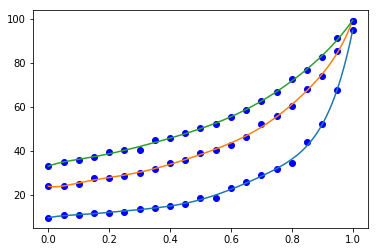

In [30]:
%matplotlib inline
import numpy.polynomial.polynomial as poly
import matplotlib.pyplot as plt

def drawFor(x,y):
    for x1, y1 in zip(x, y):
        plt.plot(x1, y1, 'bo')
    x_new = np.linspace(x[0], x[-1], num=len(x)*10)
    coefs = poly.polyfit(x, y, 8)
    ffit = poly.polyval(x_new, coefs)
    plt.plot(x_new, ffit)

drawFor(np.arange(0,1.05,0.05),pr01)
drawFor(np.arange(0,1.05,0.05),pr03)
drawFor(np.arange(0,1.05,0.05),pr05)
plt.show()

In [75]:
import random
import numpy

N = 10000000
%timeit [random.random() for _ in xrange(N)]
%timeit numpy.random.random(size=N)
%timeit range(N)
%timeit for _ in xrange(N): None
%timeit for _ in range(N): None

1 loop, best of 3: 1.2 s per loop
10 loops, best of 3: 145 ms per loop
1 loop, best of 3: 200 ms per loop
1 loop, best of 3: 277 ms per loop
1 loop, best of 3: 467 ms per loop


In [10]:
[1,2,3]+[4,5]

[1, 2, 3, 4, 5]

In [25]:
N = 10
baby_index=4
print(random.choice(range(0, baby_index)))
print(range(baby_index+1, N))
# random.choice(range(0, baby_index))
# l1 = list(random.choice(range(0, baby_index)))
# l2 = list(range(baby_index+1, N))

3
range(5, 10)
